In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


In [60]:
(x_train ,y_train) , (x_test,y_test) = mnist.load_data()
print(f"the shape of training data is {x_train.shape}  and target data is : {y_train.shape}")
print(f"the shape of testing data is {x_test.shape}  and target data is : {y_test.shape}")

the shape of training data is (60000, 28, 28)  and target data is : (60000,)
the shape of testing data is (10000, 28, 28)  and target data is : (10000,)


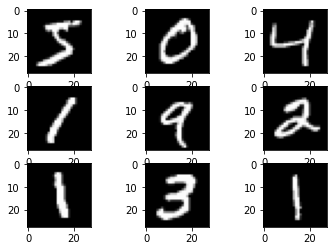

In [61]:
# plot some 9 sample of data
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i] , cmap=plt.get_cmap('gray'))
plt.show()

## Reshape data

In [62]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1]*x_test.shape[2])
print(f"the shape of training data is {x_train.shape}  and target data is : {y_train.shape}")
print(f"the shape of testing data is {x_test.shape}  and target data is : {y_test.shape}")

the shape of training data is (60000, 784)  and target data is : (60000,)
the shape of testing data is (10000, 784)  and target data is : (10000,)


In [63]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [64]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
y_train=pd.DataFrame({'Number':y_train})
y_test=pd.DataFrame({'Number':y_test})


In [65]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y_train

,Number
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [68]:
y_test

,Number
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


## Normalization

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## using PCA to decrease dimensions

In [76]:
from sklearn.decomposition import PCA
pca = PCA(.9)
pca.fit(x_train)

PCA(n_components=0.9)

In [78]:
pca.n_components_

236

In [79]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [215]:
x_train.shape

(60000, 236)

## Buliding Machine Learning Algorithms

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [81]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='sigmoid'),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=70),
    "XGB": XGBClassifier(n_estimators=70),
    "Naive Bayes": GaussianNB()
}

In [99]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(classification_report(y_test,y_pred))
    print('-'*30)

Training Model LR 
--------------


C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

Training Accuracy: 0.9312
Testing Accuracy: 0.9281
Testing Confusion Matrix: 
[[ 962    0    0    2    0    6    7    2    1    0]
 [   0 1114    3    3    0    1    3    2    9    0]
 [   5    8  928   19    8    4   13   13   32    2]
 [   3    1   18  928    1   21    2    9   21    6]
 [   2    2    7    2  919    0    8    4    8   30]
 [   7    4    3   33   12  779   13   11   26    4]
 [  12    3    8    1    7   12  911    1    3    0]
 [   0    8   26    5    4    0    0  950    1   34]
 [   6    5    6   20   10   26    6   12  874    9]
 [   9    7    2    9   24    6    0   27    9  916]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.92      0.91      1010
           4       0.93      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6

C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8683833333333333
Testing Accuracy: 0.8787
Testing Confusion Matrix: 
[[ 926    0    7    2    2   22   19    1    1    0]
 [   0 1115    4    3    0    2    3    0    8    0]
 [  21   14  857   30   13    4   44   12   27   10]
 [  14    3   42  871    4   24    3   19   19   11]
 [   2    3   20    3  889    1   11   10    0   43]
 [  24    5   12   57   10  719   15    3   38    9]
 [  40    4   41    2    9   16  841    1    4    0]
 [   5   11   27   23   15    0    2  899    3   43]
 [  18   10   13   30    5   54    7   11  816   10]
 [  12    5   10   13   44   10    0   49   12  854]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       980
           1       0.95      0.98      0.97      1135
           2       0.83      0.83      0.83      1032
           3       0.84      0.86      0.85      1010
           4       0.90      0.91      0.90       982
           5       0.84      0.81      0.82       892


C:\Users\Kerillos\AppData\Local\Temp\ipykernel_28000\87833691.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Training Accuracy: 1.0
Testing Accuracy: 0.9401
Testing Confusion Matrix: 
[[ 958    0    2    3    1    5    9    1    1    0]
 [   0 1118    6    1    1    1    5    0    2    1]
 [   9    0  960   20    2    1    8   10   21    1]
 [   1    0   10  951    0   10    1   16   17    4]
 [   1    0    7    2  940    0    7    5    2   18]
 [   7    0    5   36    9  800    9    4   17    5]
 [  12    2    3    0    6   12  919    0    4    0]
 [   1    7   17    4    8    1    0  960    3   27]
 [   7    0   12   31    8   18    6    7  881    4]
 [   7    4    4   17   31    8    0   21    3  914]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.93      0.93      1032
           3       0.89      0.94      0.92      1010
           4       0.93      0.96      0.95       982
           5       0.93      0.90      0.92       892
           6   

C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.48163333333333336
Testing Accuracy: 0.4746
Testing Confusion Matrix: 
[[ 911    0   26   10   16   11    4    1    0    1]
 [   5 1078    1    2   21    3    1    0   23    1]
 [ 107   17  316   75  264    9    8    5  228    3]
 [ 486   25   75  140   75    5    5   12  176   11]
 [   3   20   37    8  867   18    3   10    6   10]
 [ 222    4   59   11  161  152   16    1  257    9]
 [ 394    8   27    8  215   46  230    0   29    1]
 [  72   46   12   13  513    6    0  175   18  173]
 [  73   36   35   11   91   27    7    4  689    1]
 [  29   25   30    5  703    0    2   24    3  188]]
              precision    recall  f1-score   support

           0       0.40      0.93      0.56       980
           1       0.86      0.95      0.90      1135
           2       0.51      0.31      0.38      1032
           3       0.49      0.14      0.22      1010
           4       0.30      0.88      0.44       982
           5       0.55      0.17      0.26       892

In [186]:
model_xgb=XGBClassifier(n_estimators=70)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.95      0.96      1032
           3       0.94      0.95      0.94      1010
           4       0.95      0.96      0.96       982
           5       0.95      0.94      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## Deep Learning 

In [163]:
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset 
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [164]:
#One Hot Encode
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [165]:
trainY.shape

(60000, 10)

In [166]:
testY.shape

(10000, 10)

### Prepare Pixel Data
- range of pixel from 0 to 256 by convert train and test to float then divided by 255.0


In [167]:
# Convert train and test to float
trainX = trainX.astype('float32')
testX = testX.astype('float32')
#normalization 0 to 1
trainX = trainX_norm / 255.0
testX = testX_norm / 255.0

### CNN Model

In [168]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               540900    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

### Evaluate Model

In [170]:
def evaluate_model(dataX, dataY,model, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [171]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
      # plot loss
      plt.subplot(2, 1, 1)
      plt.title('Cross Entropy Loss')
      plt.plot(histories[i].history['loss'], color='blue', label='train')
      plt.plot(histories[i].history['val_loss'], color='orange', label='test')
      # plot accuracy
      plt.subplot(2, 1, 2)
      plt.title('Classification Accuracy')
      plt.plot(histories[i].history['accuracy'], color='blue', label='train')
      plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [172]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()    

In [173]:
scores, histories = evaluate_model(trainX, trainY,model=model)

> 91.908
> 94.467
> 96.058
> 96.767
> 97.283


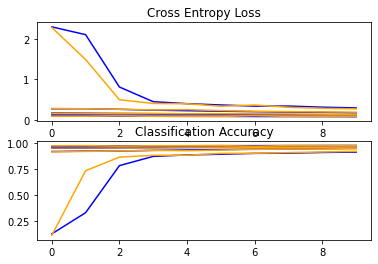

In [174]:
summarize_diagnostics(histories)

Accuracy: mean=95.297 std=1.942, n=5


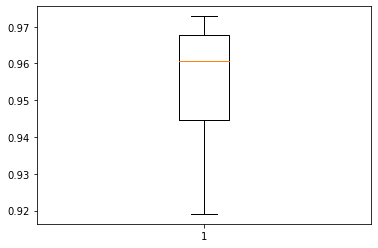

In [175]:
summarize_performance(scores)

### CNN Model With BatchNormalization

In [176]:
from tensorflow.keras.layers import BatchNormalization
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [177]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               540900    
                                                                 
 batch_normalization_3 (Batc  (None, 100)             

In [178]:
scores_2, histories_2 = evaluate_model(trainX, trainY,model=model_2)

> 97.483
> 97.292
> 97.867
> 98.900
> 98.050


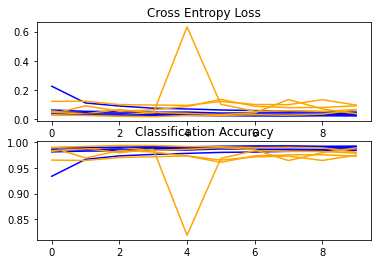

In [179]:
summarize_diagnostics(histories_2)

Accuracy: mean=97.918 std=0.560, n=5


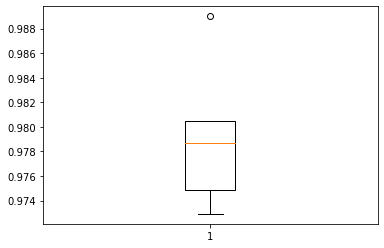

In [180]:
summarize_performance(scores_2)

### Saving models

In [184]:
model_2.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)


In [189]:
model_2.save('Cnn_Model.h5')

In [190]:
import joblib
joblib.dump(model, 'XGB_model.h5')
joblib.dump(scaler, 'XGB_scaler.h5')

INFO:tensorflow:Assets written to: ram://59a368a3-cb17-4ef7-a65e-4ae8f18a2010/assets


['XGB_scaler.h5']

In [214]:
joblib.dump(pca, 'XGB_pca.h5')

['XGB_pca.h5']

In [193]:
from tensorflow.keras.models import load_model
final_model = load_model('Cnn_Model.h5')  

In [194]:
_, acc = model.evaluate(testX, testY, verbose=0)


In [196]:
print('> %.3f' % (acc * 100.0),'%')

> 96.830 %


### Make Prediction
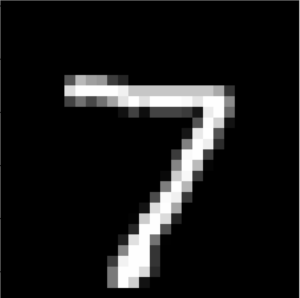

In [212]:
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [213]:
img = load_image("sample_image (1).png")
predict_value = final_model.predict(img)
digit = argmax(predict_value)
print(digit)

C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


7
